In [17]:
import pandas as pd
from matplotlib import pyplot as plt

In [18]:
def read_log(path):
    out = dict()
    with open(path, 'r') as f:
        lines = f.read().splitlines()

    args = dict()
    df = pd.DataFrame(columns=['epoch', 'batch', 'time', 'time_0', 'data', 'data_0', 'Xent', 'Xent_0', 'Htri', 'Htri_0', 'Acc', 'Acc_0'])

    for line in lines:
        if line.startswith('Experiment time'):
            out['time'] = line[16:]
        elif line.startswith('Args'):
            #Args:Namespace
            l = line[15:-1]
            l = l.split(', ')
            i=0
            while i < len(l):
                arg = l[i]
                if arg.startswith('stepsize'):
                    arg += ', ' + l[i+1]
                    k,v = arg.split('=')
                    args[k] = v
                    i+=1
                else:
                    k,v = arg.split('=')
                    args[k] = v
                i+=1
        elif line.startswith('Epoch:'):
            d = []
            ll = line.split('\t')
            for l in ll:
                l = l.split(' ')
                if l==['']:
                    pass
                elif l[0] == 'Epoch:':
                    a = l[1].index(']')
                    d.append(int(l[1][1:a]))
                    d.append(l[1][a+1:])
                else:
                    d.append(float(l[1]))
                    d.append(float(l[2][1:-1]))
            df.loc[len(df)] = d
    out['args'] = args
    out['df'] = df
            
    return out 

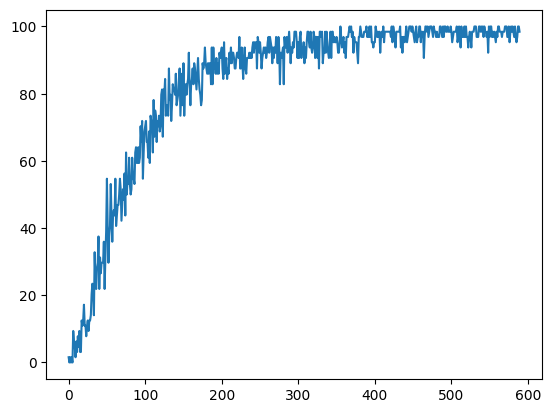

In [19]:
out1 = read_log('logs/mobilenet_v3_small-veri/log_train.txt')
plt.plot(out1['df']['Acc'])

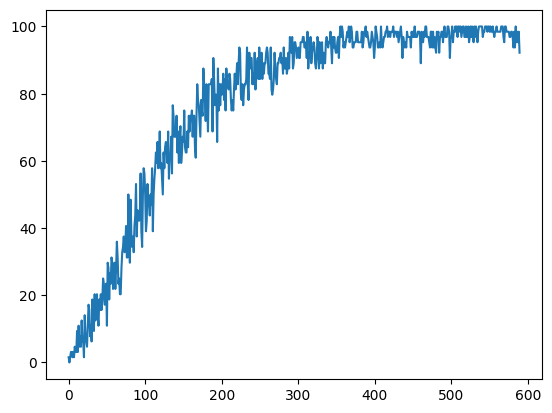

In [20]:
out2 = read_log('logs/resnet34-veri/log_train.txt')
plt.plot(out2['df']['Acc'])